# Employee Appraisal Regression Analysis
This notebook explores a dataset with employee appraisal data and builds a Linear Regression model.

**Features used**:
- Rating
- Behavior
- Experience
- Band (encoded as Band_Num)

**Target**:
- Appraisal


In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 2. Load the Data
df = pd.read_csv('appraisal_dataset.csv')
df.head()

,Rating,Behavior,Experience,Band,Band_Num,Appraisal
0,3.1,4.9,9,B4,3,84.85
1,4.9,4.8,7,B2,1,93.65
2,4.2,3.4,17,B2,1,94.82
3,3.8,4.6,17,B2,1,86.69
4,2.5,4.5,2,B2,1,63.45


### Dataset Overview

In [3]:
df.shape

(1023, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      1023 non-null   float64
 1   Behavior    1023 non-null   float64
 2   Experience  1023 non-null   int64  
 3   Band        1023 non-null   object 
 4   Band_Num    1023 non-null   int64  
 5   Appraisal   1023 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.1+ KB


In [5]:
df.describe()

,Rating,Behavior,Experience,Band_Num,Appraisal
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,3.478397,3.512317,10.420332,1.075269,71.298387
std,0.879586,0.877220,5.758450,0.926456,14.173279
min,2.000000,2.000000,1.000000,0.000000,26.450000
25%,2.700000,2.700000,5.000000,0.000000,60.805000
50%,3.500000,3.500000,11.000000,1.000000,71.150000
75%,4.200000,4.300000,15.000000,2.000000,81.155000
max,5.000000,5.000000,20.000000,3.000000,113.100000


In [6]:
df.describe(include="object")

,Band
count,1023
unique,4
top,B2
freq,407


In [7]:

df.isnull().sum()

Rating        0
Behavior      0
Experience    0
Band          0
Band_Num      0
Appraisal     0
dtype: int64

### Encode Categorical Feature (Band)

In [8]:
le = LabelEncoder()
df['Band_Num'] = le.fit_transform(df['Band'])
df[['Band', 'Band_Num']].drop_duplicates()

,Band,Band_Num
0,B4,3
1,B2,1
5,B3,2
6,B1,0


### Visuals 

- A Pair Plot (or scatterplot matrix) is a visualization tool that shows relationships between multiple numerical variables in a dataset, plotted pairwise. It is widely used in Exploratory Data Analysis (EDA) to quickly identify correlations, trends, clusters, or outliers.

### What It Shows:
- Scatterplots: Each off-diagonal cell shows a scatterplot between two features.
- Histograms / KDEs: The diagonal shows distributions (usually histograms or kernel density estimates) for each variable.
- Color/Hue (optional): Categorical features can be used to color points and separate distributions by class (e.g., hue='Band').

#### Use Cases:
- Spot linear or nonlinear relationships
- Detect clusters or groupings
- Observe correlations
- Identify outliers
- See distribution shapes of each feature

#### Limitations:
- Can get crowded with too many variables (use with 5–6 numerical features max)
- Doesn't show feature importance — just relationships

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


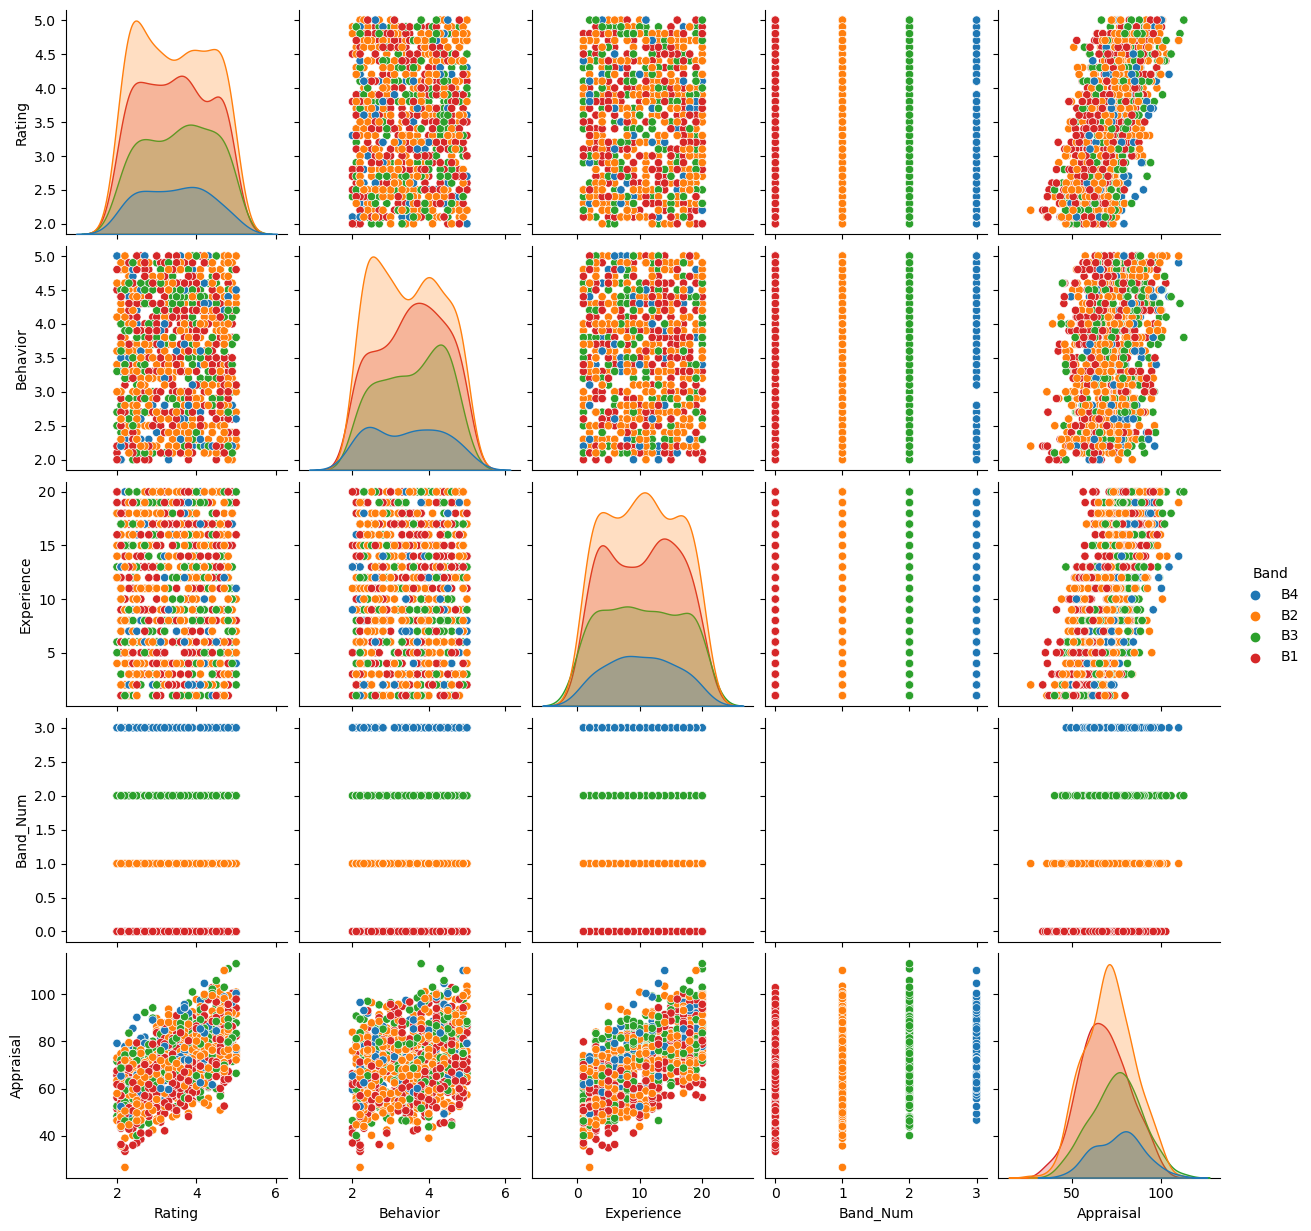

<Figure size 1100x800 with 0 Axes>

<Figure size 1100x800 with 0 Axes>

In [9]:
sns.pairplot(df, hue='Band')
plt.show()

plt.figure(figsize=(11, 8))

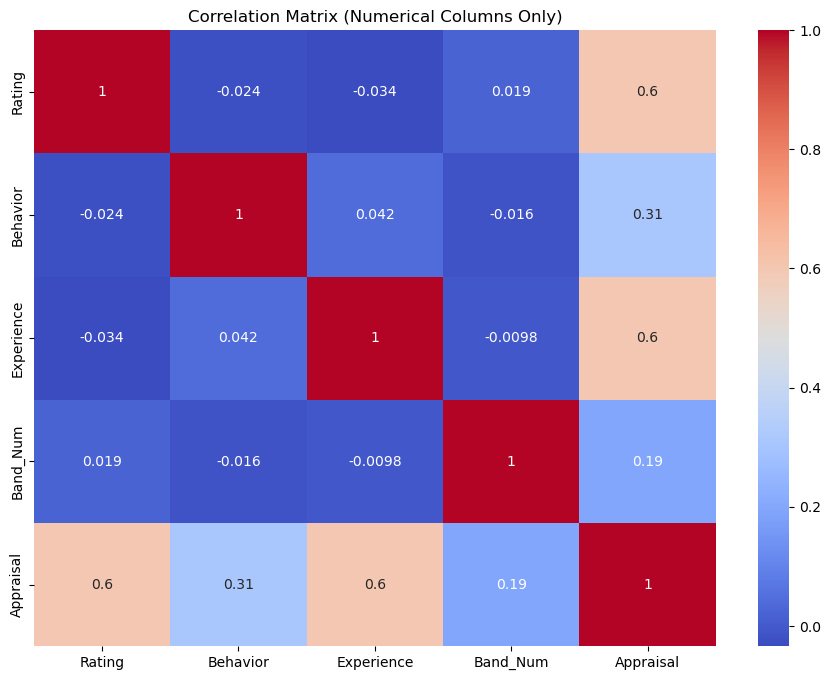

In [10]:
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()

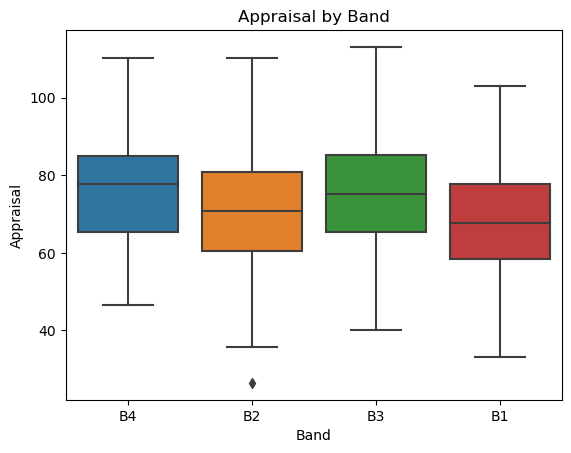

In [11]:
sns.boxplot(x='Band', y='Appraisal', data=df)
plt.title("Appraisal by Band")
plt.show()

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


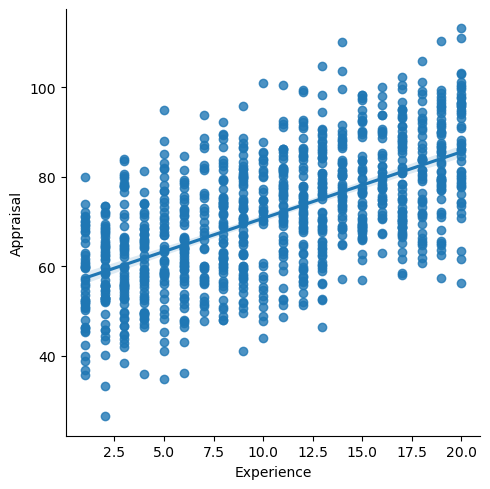

In [12]:

sns.lmplot(x='Experience', y='Appraisal', data=df)

### Data Preparation

In [13]:
X = df[['Rating', 'Behavior', 'Experience', 'Band_Num']]
y = df['Appraisal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Linear Regression Model

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

R2 Score: 0.8713438627272418
MSE: 24.88148233009516
Coefficients: [10.18785705  4.8082995   1.51022801  2.92957254]
Intercept: 0.08144186829784417


## Linear equation for Salary Prediction

Appraisal = 10.2(rating) + 5(Exp) +1.5(be)+3(B_num) + 24.88 

### K-Fold Cross-Validation

K-Fold Cross Validation is a technique used to evaluate the performance of a machine learning model by splitting the dataset into K equal parts (folds):

- The model is trained on K-1 folds and validated on the remaining fold.
- This process is repeated K times, each time using a different fold as the validation set.
- The final performance is the average of all K validation scores.
###  Why use it?
- It helps reduce overfitting.
- Provides a more robust estimate of model performance.
- Ensures that every data point is used for both training and validation.

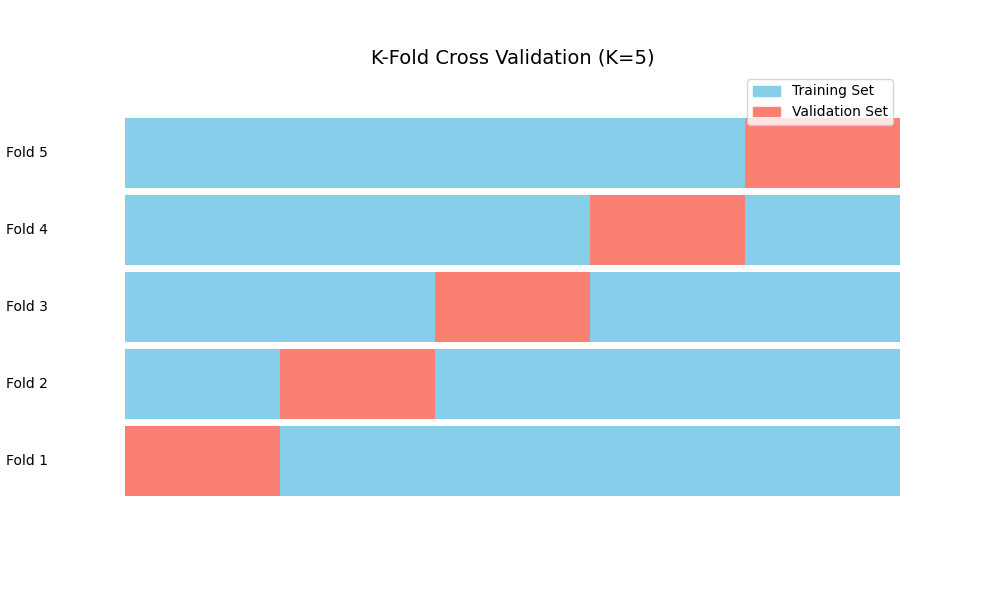

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("K-Fold R2 Scores:", scores)
print("Average R2 Score:", np.mean(scores))

K-Fold R2 Scores: [0.87134386 0.87550696 0.88419112 0.88011813 0.86527841]
Average R2 Score: 0.8752876954373467


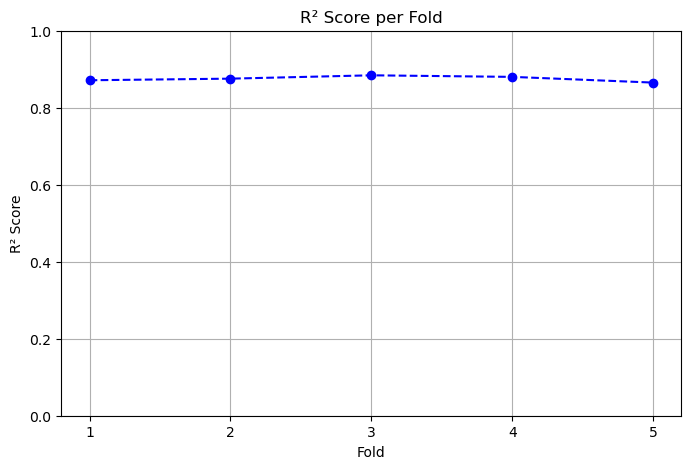

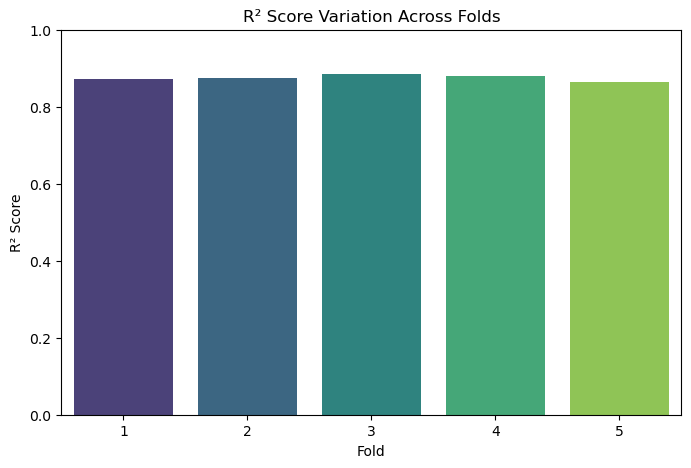

In [16]:
# Visualizing R2 score variation across folds
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(scores)+1), scores, marker='o', linestyle='--', color='blue')
plt.title("R² Score per Fold")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(range(1, len(scores)+1))
plt.show()

# Alternatively, use barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(1, len(scores)+1)), y=scores, palette='viridis')
plt.title("R² Score Variation Across Folds")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()


### Insights & Conclusion
- Experience and Rating positively impact Appraisal.
- Appraisal is somewhat influenced by Band.
- Linear Regression performs reasonably well.
- Cross-validation helps validate the model across different subsets.

### Quick Practice:
- Check Model Performance taling two paramters, Three parameters,
- Vary test and train Split 
- Name your Model as Appraisalsys

## Prediction to New Data

In [17]:
# Step 1: Load new data
new_df = pd.read_csv('NewData.csv')
new_df.head()


,Rating,Behavior,Experience,Band
0,5,4,10,A
1,4,4,5,B
2,3,3,6,C
3,2,2,3,D
4,1,2,1,A


In [18]:
# Step 2: Encode the 'Band' column using the same LabelEncoder
# Important: Use the SAME label encoder instance used in training
# If not available, you can refit with the same category order

# Example: manually set the encoder based on original training data
band_classes = ['A', 'B', 'C', 'D']  # Replace with actual categories from training
le = LabelEncoder()
le.fit(band_classes)

new_df['Band_Num'] = le.transform(new_df['Band'])


In [20]:
# Step 3: Select relevant features
X_new = new_df[['Rating', 'Behavior', 'Experience', 'Band_Num']]


In [21]:
# Step 4: Predict using the trained model
new_predictions = model.predict(X_new)
new_df['Predicted_Appraisal'] = new_predictions

# View results
new_df[['Rating', 'Behavior', 'Experience', 'Band', 'Predicted_Appraisal']]


,Rating,Behavior,Experience,Band,Predicted_Appraisal
0,5,4,10,A,85.356205
1,4,4,5,B,70.546781
2,3,3,6,C,59.990425
3,2,2,3,D,43.393157
4,1,2,1,A,21.396126
5,5,5,12,B,96.114533
6,4,3,7,C,71.688510
7,3,4,4,D,64.707841
8,2,1,0,A,25.265455
9,1,1,2,B,21.027627


In [22]:
new_df.to_csv('predicted_appraisals.csv', index=False)
print("Predictions saved to predicted_appraisals.csv")


Predictions saved to predicted_appraisals.csv
